In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("Dataset/Credit Card.csv")
print(data.head())

In [24]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [25]:
#Exploring transaction type
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [26]:
#Checking the default renderers
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'jupyterlab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [27]:
#Changing the default renderer
pio.renderers.default = "jupyterlab"

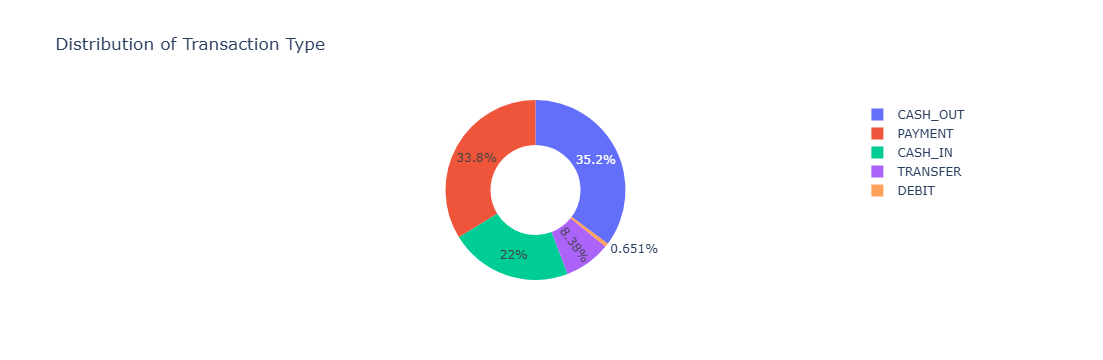

In [28]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, values = quantity, names = transactions, hole = 0.5, title = "Distribution of Transaction Type")

figure.show()

In [29]:
#Removing the string data
updated_data = pd.read_csv("Dataset/Credit Card.csv", usecols = lambda column: column != "type" and column != "nameOrig" and column != "nameDest")
print(updated_data.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


In [30]:
#Correlation Analysis
correlation = updated_data.corr()
print(correlation["isFraud"].sort_values(ascending = False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [31]:
#Checking the no. of fraud transactions
print(updated_data["isFraud"].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [32]:
data = pd.read_csv("Dataset/Credit Card.csv")

print("Type: \n", data["type"].unique())
print("isFraud: \n", data["isFraud"].unique())

Type: 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
isFraud: 
 [0 1]


In [33]:
backup_data = pd.read_csv("Dataset/Credit Card.csv")

type_dictionary = {"CASH_OUT" : 1,
                  "CASH_IN" : 2,
                  "TRANSFER" : 3,
                  "DEBIT" : 4,
                  "PAYMENT" : 5}

isFraud_dictionary = {0 : "No Fraud", 1 : "Fraud"}

data["type"] = data["type"].map(type_dictionary)
data["isFraud"] = data["isFraud"].map(isFraud_dictionary)

print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     5   9839.64  C1231006815       170136.0       160296.36   
1     1     5   1864.28  C1666544295        21249.0        19384.72   
2     1     3    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     5  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [34]:
#Splitting data
from sklearn.model_selection import train_test_split

features = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
target = np.array(data[["isFraud"]])

In [35]:
#Training the Machine Learning model
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.10, random_state = 42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)#Training
print(model.score(x_test, y_test))

0.9997501029450132


In [36]:
data["amount"].max()

np.float64(92445516.64)

In [43]:
#Prediction 
import random
random_type = random.randint(1, 5)
random_amount = random.randrange(1000, 9999999)
old_balance = random.randrange(1000, 99999999)
new_balance = old_balance - random_amount

predict_features = np.array([[random_type, random_amount, old_balance, new_balance]])
print("Features: \n", predict_features)

print(model.predict(predict_features))

Features: 
 [[       4  7709972  6258964 -1451008]]
['Fraud']
